# Компьютерные игры и платформы

Нам доступны исторические данные о продажах игр для различных игровых платформ, например, Xbox или PlayStation. Эти данные включают в себя оценки пользователей и экспертов, объёмы продаж в различных регионах, информацию о жанре и годе выхода релиза, а также о рейтинге, определяющем наиболее подходящую возрастную категорию игры. От нас требуется провести исследование для компьютерного магазина "Стримчик", который продаёт компьютерные игры по всему миру, и выявить закономерности, которые определяют успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Цели исследования**:

**1. Провести исследовательский анализ данных и определить:**
1. Сколько игр выпускалось в разные годы и важны ли данные за все периоды.
2. За какой срок появляются новые и исчезают старые платформы.
3. Какие платформы потенциально наиболее прибыльны.
4. Как влияют на продажи отзывы пользователей и критиков.
5. Какие жанры являются самыми прибыльными.

**2. Составить портрет пользователя каждого региона**: определить для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5).
2. Самые популярные жанры (топ-5).
3. Влияет ли рейтинг [ESRB](https://www.esrb.org/) на продажи в отдельном регионе.


**3. Проверить гипотезы:**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Ход исследования**

Данные о продажах игр находятся в файле `/datasets/games.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в несколько этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Составление портрета пользователя.
 5. Проверка гипотез.

## Обзор данных. 

**Загрузим библиотеки**

In [1]:
#импортируем библиотеку pandas, а также необходимые для дальнейшего анализа библиотеки и пакеты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')


In [2]:
#загрузим данные из файла в датафрейм
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

###  Изучим общую информацию о полученном датафрейме

**Выведем первые 10 строк датафрейма data на экран**

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Выведем основную информацию о датафрейме с помощью метода ınfo**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Набор данных содержит сведения о 16715 релизах игр, хранящихся в 11 столбцах. 

Мы располагаем данными о продажах, оценках пользователей и экспертов, и рейтингах игр для различных платформ.

Переменные следующие:

__Name__ — название игры

__Platform__ — платформа, для которой выпускалась игра

__Year_of_Release__ — год выпуска

__Genre__ —  жанр

__NA_Sales__ — продажи в миллионах штук в Северной Америке

__EU_Sales__ — продажи в миллионах штук в Европе

__JP_Sales__ — продажи в миллионах штук в Японии

__Other_Sales__ — продажи в миллионах штук в других странах

__Critic_Score__ — оценка критиков (максимум 100)

__User_Score__ — оценка пользователей (максимум 10)

__Rating__ — рейтинг [ESRB](https://www.esrb.org/)

**Построим общую гистограмму для всех числовых столбцов**

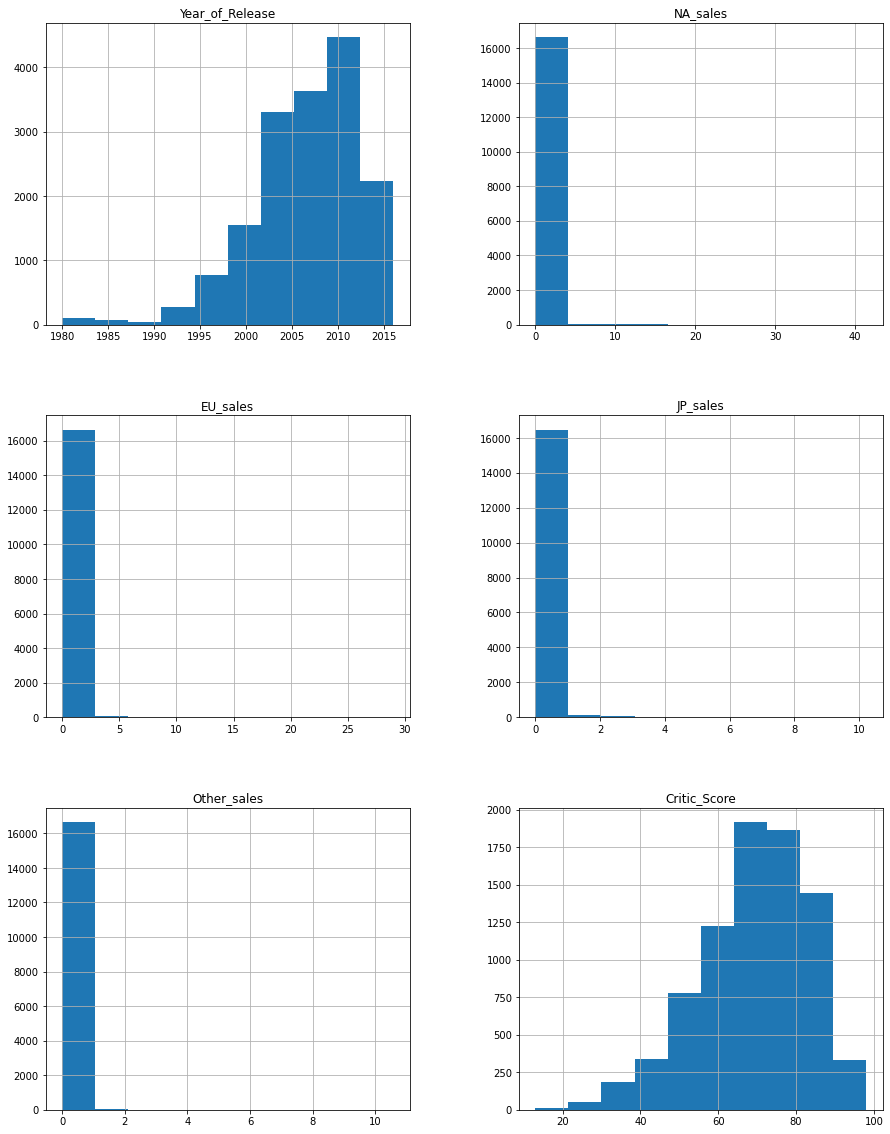

In [5]:
data.hist(figsize=(15,20));

In [6]:
# и посмотрим описание данных
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**По гистограммам и описанию данных можно предварительно отметить:**
- Для всех числовых столбцов отсутствуют отрицательные значения;
- Для столбцов с количеством продаж в различных регионах форма распределения не похожа на нормальное распределение или распределение Пуассона. Видимо есть выбросы, определяющие вид гистограмм.

In [7]:
#проверим наличие явных дубликатов в датафрейме
print(f'Количество явных дубликатов :{data.duplicated().sum()}')

Количество явных дубликатов :0


## Предобработка данных

### Выполним переименование столбцов

In [8]:
# перечень названий столбцов
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Приведём названия в соответствие с хорошим стилем, сделаем все символы строчными.

In [9]:
# переименование столбцов
# Создадим словарь для переименования столбцов, в котором укажем старые и новые наименования.

new_names = {'Name' : 'name', 'Platform' : 'platform', \
             'Year_of_Release' : 'year_of_release', \
             'Genre' : 'genre', 'NA_sales' : 'na_sales', \
             'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', \
             'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', \
             'User_Score' : 'user_score', 'Rating' : 'rating'}

# вызовем метод rename() и передадим ему словарь с соответствием старых и новых значений колонок
# результат сохраним в переменной data

data = data.rename(columns=new_names)

In [10]:
# проверка переименования столбцов
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Найдём и изучим пропущенные значения в столбцах

**Определим, в каких столбцах есть пропуски.** 

In [11]:
#подсчет числа пропусков
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Пропуски есть в шести колонках из одиннадцати.
Единичные в столбцах `name`, `genre`, несколько сотен пропусков в `year_of_release`, и большое количество в столбцах с оценками пользователей, критиков, и рейтингом игр.

Посмотрим строчки без наименования игры или жанра:

In [12]:
data[data['name'].isna() | data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим такие строки с пустыми наименованиями:

In [13]:
data = data.dropna(subset=['name', 'genre'])

In [14]:
#убедимся, что не осталось пропусков в колонках name и genre
print(data.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


Посмотрим относительное количество пропусков:

In [15]:
#определяем долю пропусков
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


В столбце `year_of_release` не заполнены данные для 1.6% от общего объёма датафрейма.

Удалим строки с пропусками в `year_of_release`.  Результат запишем в датасет `good_data`.

In [16]:
# удаляем строки с пропусками в колонке с датой выхода игры
good_data = data.dropna(subset=['year_of_release'])

In [17]:
#определяем долю пропусков
pd.DataFrame(round(good_data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.500000
user_score,40.200000


Для колонок `critic_score` и `user_score` оставим пропуски.

Для столбца `rating` заменим пропуски константой "рейтинг не определён"

In [18]:
good_data['rating'] = good_data['rating'].fillna('рейтинг не определён')

#### Возможные причины пропусков в данных

**К пропускам в данных могли привести следующие причины:**
- ошибки при вводе данных и необязательность заполнения полей, например, для наименования, жанра и года выпуска игры.
- отсутствие данных, например для рейтингов и оценок пользователей и экспертов. Возможно не все игры проходят процедуру определения рейтинга, и не для всех есть оценки пользователей и критиков.

### Рассмотрим типы данных в столцах

In [19]:
# еще раз посмотрим на информацию о датафрейме и типы данных в каждом столце
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Посмотрим уникальные значения в столбцах `critic_score`, `user_score`, `rating`.

In [20]:
for column in ['critic_score', 'user_score', 'rating']:
    print(f"Уникальные значения в столбце {column}:")
    print(good_data[column].unique(),'\n')

Уникальные значения в столбце critic_score:
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.] 

Уникальные значения в столбце user_score:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7'] 

Уникаль

- Оценка критиков составляет до 100 баллов и содержит целые значения. Поменяем тип столбца на целочисленный.

- Оценка пользователей может быть до 10 баллов и измеряется с точностью до одной десятой. Поменяем тип столбца на вещественный. Также в этом столбце есть значение "tbd", которое может означать  `To Be Determined` (будет определено) или `To Be Decided` (будет решено). Возможно, при малом количестве пользователей, сделавших оценку, значение сначала выставляется равным "tbd", и затем при достижении определённого количества проголосовавших меняется на какое-то конкретное среднее значение. Поэтому в рамках нашего исследования перед сменой типа столбца мы заменим значение "tbd" на неопределенное.

- В столбце рейтинг есть значения "K-A"- для детей, которые в 1998 году были переименованы в "E", поэтому заменим такие значения и в нашем датасете.

- В столбце рейтинг есть значения "RP", которые означают, что рейтинг ещё не присвоен. Заменим данные значения на константу 'рейтинг не определён'.

In [21]:
#заменяем значение tbd на NaN в колонке user_score
good_data['user_score'] = good_data['user_score'].replace('tbd', np.nan)

In [22]:
#заменяем значение tbd на NaN в колонке user_score
good_data['rating'] = good_data['rating'].replace('K-A', 'E')
good_data['rating'] = good_data['rating'].replace('RP', 'рейтинг не определён')

***поменяем тип данных у столбцов:***

- для столбцов `year_of_release` и `critic_score` поменяем тип данных на int
- для столбца `user_score` поменяем тип данных на float


Столбец               |Текущий тип данных|Комментарий    
   :-----                |:--------:        |----
   name                  | object           | 
   platform              | object           |
   year_of_release       | float64          |меняем на int
   genre                 | object           |
   na_sales              | float64          |
   eu_sales              | float64          |
   jp_sales              | float64          |
   other_sales           | float64          |
   critic_score          | float64          |меняем на int
   user_score            | object           |меняем на float
   rating                | object           |

In [23]:
good_data[['year_of_release','critic_score']] = good_data[['year_of_release','critic_score']].astype('Int64')

In [24]:
good_data['user_score'] = good_data['user_score'].astype('float')

In [25]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [26]:
good_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,рейтинг не определён
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,рейтинг не определён
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,рейтинг не определён
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,рейтинг не определён
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,рейтинг не определён
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,рейтинг не определён


### Добавим информацию о суммарных продажах

In [27]:
#добавляем столбец `total_sales` с суммой продаж во всех регионах
good_data['total_sales'] = good_data['na_sales'] + good_data['eu_sales'] + good_data['jp_sales'] + good_data['other_sales']

Оценим динамику по количеству проданных копий:

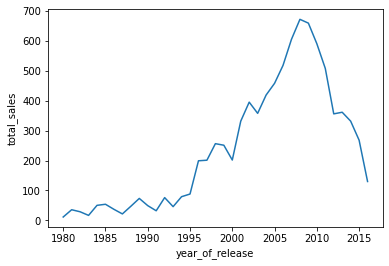

In [28]:
sns.lineplot(x='year_of_release', y='total_sales', data=good_data.groupby('year_of_release').sum());

Пик по количеству проданных копий был достигнут в конце нулевых годов, после чего начался тренд на снижение. 

In [29]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = good_data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы и важны ли данные за все периоды

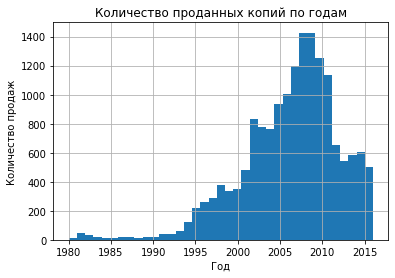

In [30]:
#посмотрим распределение по количеству игр по годам
plt.title('Количество проданных копий по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
good_data['year_of_release'].hist(bins=37)
plt.show()

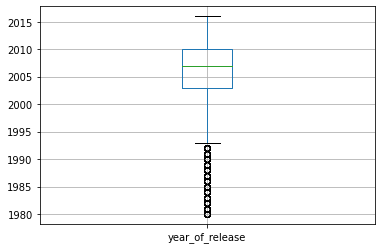

In [31]:
good_data.boxplot('year_of_release');

Довольно мало игр старше 1990. Оставим для анализ данные, начиная с 1991 года.

In [32]:
good_data = good_data.query('year_of_release>1990')

### За какой срок появляются новые и исчезают старые платформы.

Создадим таблицу, в которой рассчитаем время существования различных платформ.
Сначала делаем сводную таблицу с указанием первого и последнего года, в которые для конкретной платформы были релизы игр. Затем считаем разность для получения длительности существования платформы.

In [33]:
#создаём сводную таблицу с указанием начального и конечного годов
platform_period = good_data.pivot_table(index='platform', values='year_of_release', aggfunc=(['min', 'max']))

In [34]:
#переименовываем колонки для удобства
columns=['start_year', 'end_year']
platform_period.columns = columns

In [35]:
#добавляем столбец с длительностью периода существования платформы
platform_period['period'] = platform_period['end_year'] - platform_period['start_year']

Посмотрим распределение по длительности существования платформ.

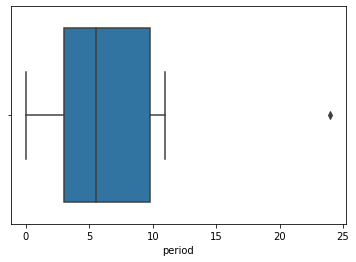

In [36]:
sns.boxplot(data=platform_period, x='period');

In [37]:
platform_period['period'].describe()

count    30.000000
mean      6.266667
std       4.961461
min       0.000000
25%       3.000000
50%       5.500000
75%       9.750000
max      24.000000
Name: period, dtype: float64

Медианный срок существования платформы составляет пять с половиной лет.

In [38]:
#смотрим 10 платформ с наибольшим сроком
platform_period.sort_values(by='period', ascending=False).head(10)

,start_year,end_year,period
platform,,,
PC,1992,2016,24
PS2,2000,2011,11
X360,2005,2016,11
PSP,2004,2015,11
GB,1991,2001,10
Wii,2006,2016,10
DC,1998,2008,10
PS3,2006,2016,10
DS,2004,2013,9


Игры на PC выбиваются из общего ряда и существуют более 24 лет. Остальные платформы идут с большим отставанием по сроку жизни.

Построим график по суммарным продажам в разрезе платформ.

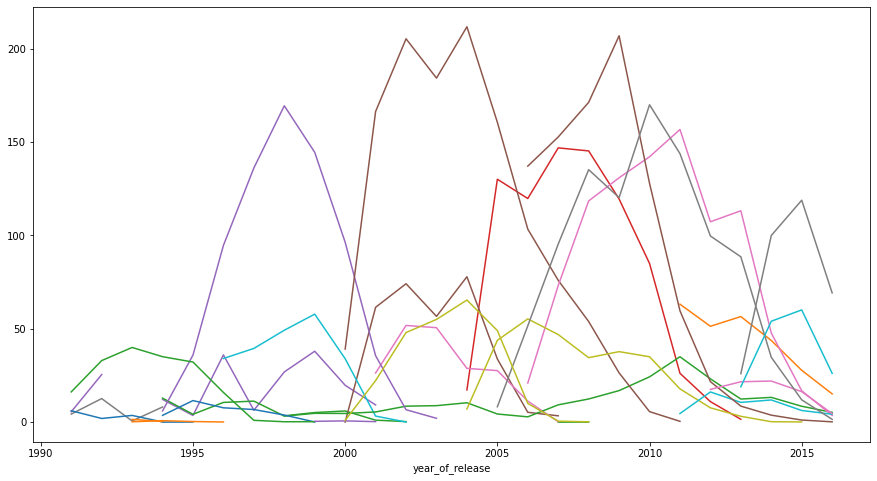

In [39]:
(good_data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'})
    .unstack('platform').plot(legend=False, figsize=(15,8)));

Платформы набирают популярность за один-два года, затем также примерно один-два года удерживаются на пике популярности, после чего теряют продажи. При этом видно, что к 2015-му году только две платформы имели растущий тренд, а все остальные уже шли на спад. Так как за 2016 год у нас неполные данные, то можно предположить, что эти две платформы будут иметь успех в 2016-2017 годах.

### Какие платформы потенциально наболее прибыльны

Посмотрим платформы, которые продолжают существовать к моменту исследования (на 2016 год)

In [40]:
#смотрим платформы, для которых продолжается выпуск игр на момент исследования (2016 год)
print(
(platform_period
     .query('end_year == 2016')
     .sort_values(by='period', ascending=False))
)   

          start_year  end_year  period
platform                              
PC              1992      2016      24
X360            2005      2016      11
PS3             2006      2016      10
Wii             2006      2016      10
3DS             2011      2016       5
PSV             2011      2016       5
WiiU            2012      2016       4
PS4             2013      2016       3
XOne            2013      2016       3


In [41]:
list_actual_platform = list(platform_period.query('end_year == 2016').index)

Построим график продаж за последние три года для платформ, которые продолжают существовать.

In [42]:
df_sales_actual_platform = (good_data.query('platform in @list_actual_platform and year_of_release>=2013')
    .groupby(['platform', 'year_of_release'])
    .agg({'total_sales': 'sum'})
    )

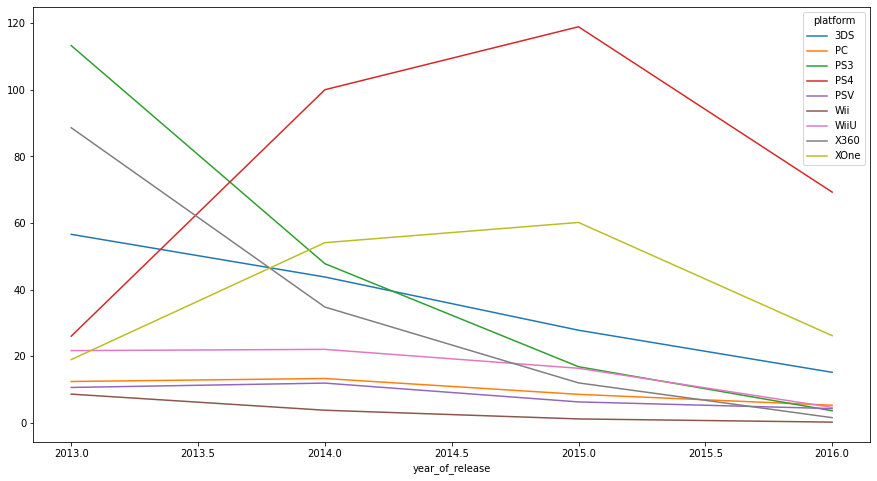

In [43]:
(df_sales_actual_platform.unstack('platform').plot(y='total_sales', figsize=(15,8)));

Оставим для дальнейшего анализа данные с 2014 года и более свежие.

In [44]:
actual_data = good_data.query('year_of_release>=2014')

In [45]:
actual_data.shape

(1689, 12)

В 2014-2015 годах только две платформы PS4 и XOne показали восходящую динамику по общим продажам. Следом по общим продажам в 2015-2016 годах идёт платформа 3DS. Также в список потенциально прибыльных можно добавить игры для PC, которые дольше всех выпускаются и при этом имеют стабильный уровень продаж. 

In [46]:
#запишем список потенциально прибыльных платформ
profitable_platforms = ['PS4','XOne','3DS','PC']

**Построим график "ящик с усами" для потенциально прибыльных платформ**

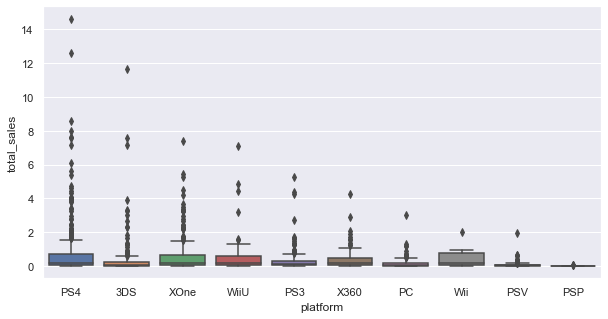

In [47]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(y='total_sales', x='platform',  \
            data=actual_data);

"Хиты" с наибольшей суммой продаж были для платформ PS4 и 3DS.

Для всех платформ верхняя граница межквартильного размаха не превышает 2 млн. Ограничим на графике верхнюю границу оси Y данной суммой.

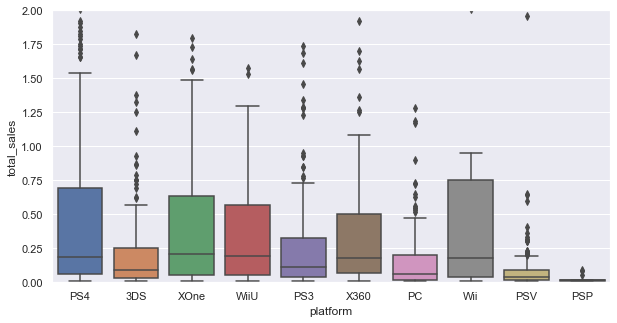

In [48]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(y='total_sales', x='platform', \
            data=actual_data)
plt.ylim(0,2);

Платформы PS4 и XOne, а также WiiU, Wii, X360 лидируют по медианной сумме продаж. У платформ 3DS, PS3 и PC этот показатель намного ниже, а самые низкие показатели у PSV и PSP. 
Для PS4, XOne и Wii граница третьего квартиля намного превышает аналогичную границу для других платформ.

**Можно сделать вывод**, что наиболее прибыльными являются платформы PS4, XOne, WiiU и Wii. При этом у платформы 3DS хиты сопоставимы по уровню продаж с хитами для PS4. 

### Как влияют на продажи отзывы пользователей и критиков

Сначала рассмотрим данные для платформы PS4

Посмотрим общее распределение оценок критиков и пользователей для платформы PS4

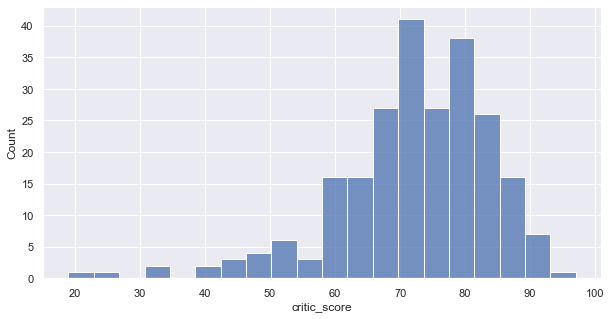

In [49]:
sns.histplot(actual_data[actual_data['platform'] == 'PS4']['critic_score'], bins=20)
plt.show()

In [50]:
actual_data[actual_data['platform'] == 'PS4']['critic_score'].describe()

count    237.000000
mean      72.164557
std       12.214985
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       97.000000
Name: critic_score, dtype: float64

In [51]:
actual_data[actual_data['platform'] == 'PS4']['critic_score'].value_counts().head()

73    16
80    12
69    11
72    10
79    10
Name: critic_score, dtype: Int64

Среднее и медианное значения оценок критиков близки и находятся в районе 72-73 баллов. Наиболее популярны оценки около 70 и около 80 баллов.

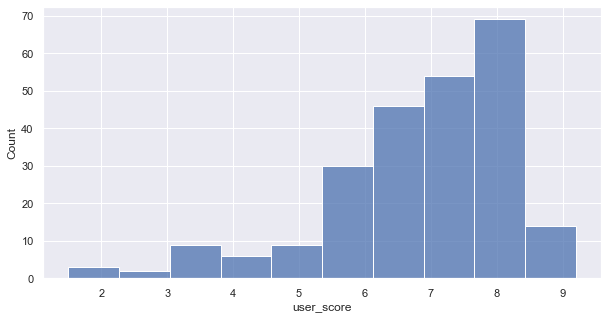

In [52]:
sns.histplot(actual_data[actual_data['platform'] == 'PS4']['user_score'], bins=10)
plt.show()

In [53]:
actual_data[actual_data['platform'] == 'PS4']['user_score'].describe()

count    242.000000
mean       6.828099
std        1.399035
min        1.500000
25%        6.200000
50%        7.100000
75%        7.875000
max        9.200000
Name: user_score, dtype: float64

In [54]:
actual_data[actual_data['platform'] == 'PS4']['user_score'].value_counts().head()

8.1    14
7.8    12
7.1    11
7.6    11
8.0    10
Name: user_score, dtype: int64

Среднее и медианное значения оценок пользователей около 7 баллов. Наиболее популярна оценка 8.1 балла.

Построим диаграмму рассеяния и посчитаем коэффициент корреляции между оценками критиков и суммой продаж.

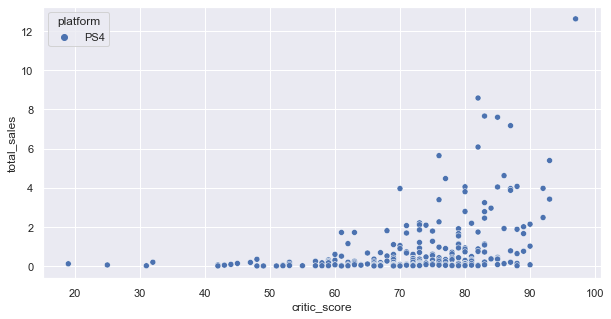

In [55]:
sns.scatterplot(x='critic_score', y='total_sales', hue="platform", data=actual_data.query('platform=="PS4"'))
plt.show()

In [56]:
actual_data[actual_data['platform'] =="PS4"][['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.402661
critic_score,0.402661,1.000000


Есть положительная взаимосвязь между оценками критиков и количеством продаж для платформы PS4. Коэффициент корреляции составил 0.4.

Построим диаграмму рассеяния и посчитаем коэффициент корреляции между оценками пользователей и количеством проданных копий.

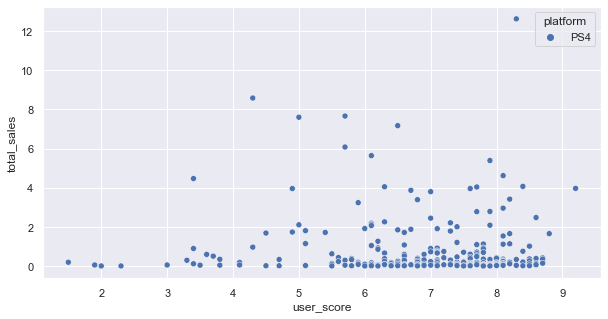

In [57]:
sns.scatterplot(x='user_score', y='total_sales', hue="platform", data=actual_data.query('platform=="PS4"'))
plt.show()

In [58]:
actual_data[actual_data['platform'] =="PS4"][['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


Коээфициент корреляции находится около нуля. Для платформы PS4 не наблюдается взаимосвязи между оценками пользователей и количеством продаж.

**Проверим, совпадают ли выводы с продажами игр на других платформах**

Построим диаграмму рассеяния для оценок экспертов и сумм продаж в разрезе нескольких платформ.

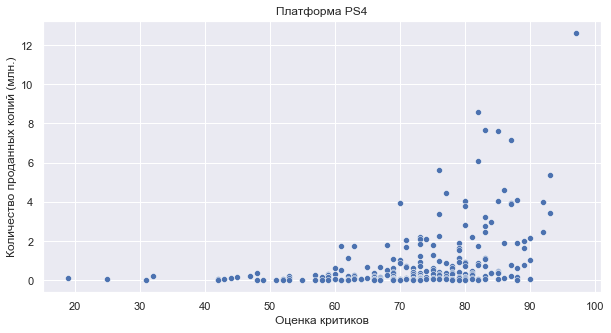

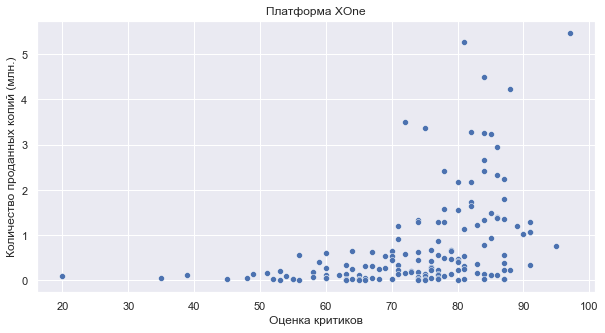

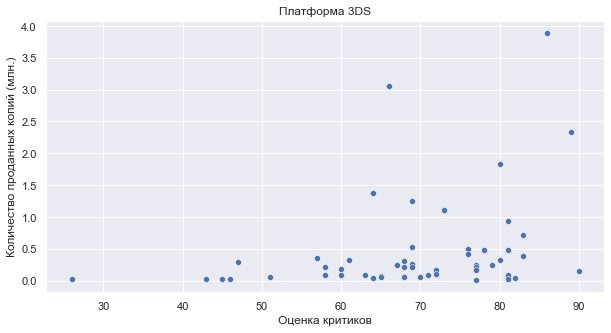

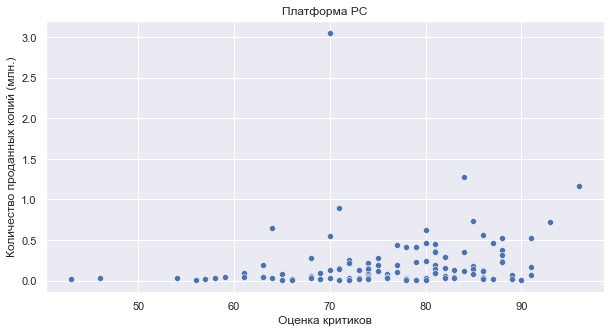

In [59]:
for platform in profitable_platforms:
    plt.title(f'Платформа {platform}')
    plt.ylabel('Количество проданных копий (млн.)')
    plt.xlabel('Оценка критиков')
    sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('platform == @platform'))
    plt.show()

In [60]:
for platform in profitable_platforms:
    print(f'Платформа {platform}. Коэффициент корреляции между оценкой критиков и количеством продаж:')
    display(actual_data[actual_data['platform'] ==platform][['total_sales', 'critic_score']].corr())

Платформа PS4. Коэффициент корреляции между оценкой критиков и количеством продаж:


,total_sales,critic_score
total_sales,1.000000,0.402661
critic_score,0.402661,1.000000


Платформа XOne. Коэффициент корреляции между оценкой критиков и количеством продаж:


,total_sales,critic_score
total_sales,1.000000,0.428677
critic_score,0.428677,1.000000


Платформа 3DS. Коэффициент корреляции между оценкой критиков и количеством продаж:


,total_sales,critic_score
total_sales,1.000000,0.314117
critic_score,0.314117,1.000000


Платформа PC. Коэффициент корреляции между оценкой критиков и количеством продаж:


,total_sales,critic_score
total_sales,1.000000,0.174634
critic_score,0.174634,1.000000


Для платформ XOne и 3DS по аналогии с платформой PS4 наблюдается взаимосвязь между оценками экспертов и количеством продаж. Коэффиценты корреляции находятся в диапазоне 0.35 - 0.41. 

Но для PC такая взаимосвязь практически отсутствует или слабо выражена, коээфициент Пирсона в два раза меньше и составляет 0.19.

Построим диаграмму рассеяния для оценок пользователей и количеством проданных копий в разрезе нескольких платформ.

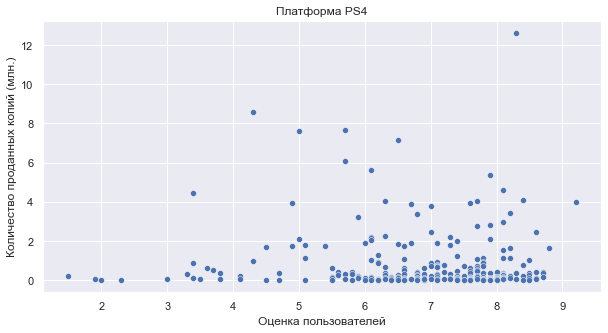

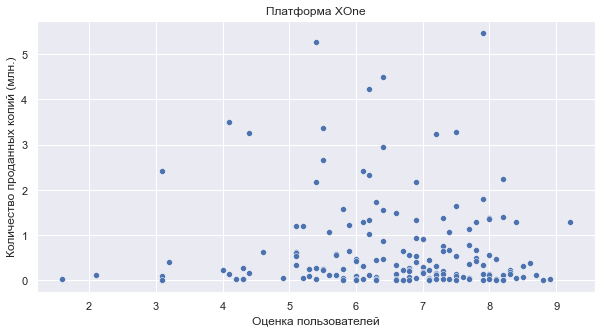

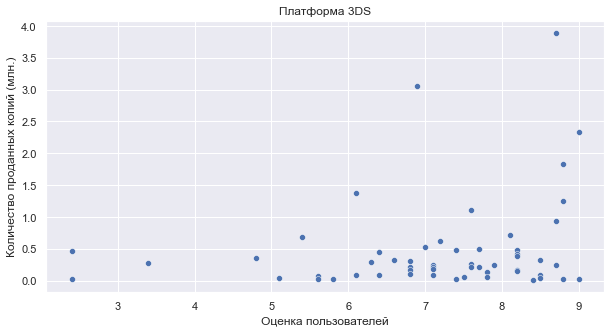

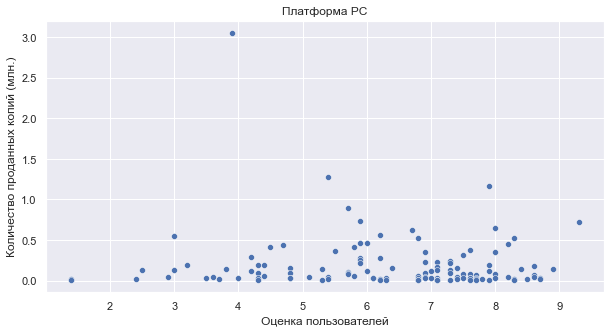

In [61]:
for platform in profitable_platforms:
    plt.title(f'Платформа {platform}')
    plt.ylabel('Количество проданных копий (млн.)')
    plt.xlabel('Оценка пользователей')
    sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('platform == @platform'))
    plt.show()

In [62]:
for platform in profitable_platforms:
    print(f'Платформа {platform}. Коэффициент корреляции между оценкой пользователей и количеством продаж:')
    display(actual_data[actual_data['platform'] ==platform][['total_sales', 'user_score']].corr())

Платформа PS4. Коэффициент корреляции между оценкой пользователей и количеством продаж:


,total_sales,user_score
total_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


Платформа XOne. Коэффициент корреляции между оценкой пользователей и количеством продаж:


,total_sales,user_score
total_sales,1.000000,-0.070384
user_score,-0.070384,1.000000


Платформа 3DS. Коэффициент корреляции между оценкой пользователей и количеством продаж:


,total_sales,user_score
total_sales,1.000000,0.215193
user_score,0.215193,1.000000


Платформа PC. Коэффициент корреляции между оценкой пользователей и количеством продаж:


,total_sales,user_score
total_sales,1.000000,-0.071597
user_score,-0.071597,1.000000


Практически для всех платформ отсутствует взаимосвязь между оценками пользователей и суммой продаж. Только для платформы 3DS коэффициент Пирсона достигает 0.21, но видимо это не указывает на наличие сильной взаимосвязи.

### Какие жанры являются самыми прибыльными

Посмотрим на количество игр в различных жанрах.

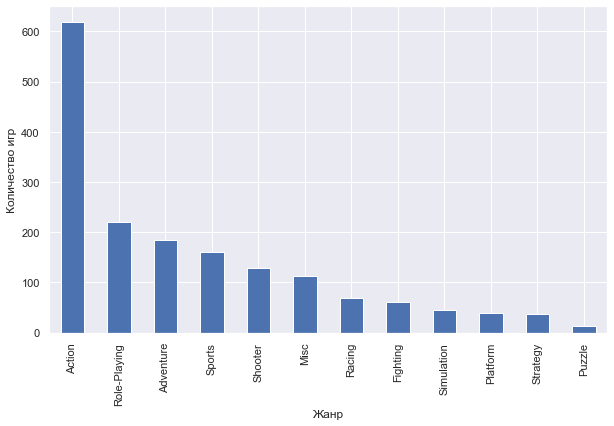

In [63]:
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
actual_data['genre'].value_counts().plot(kind='bar', figsize=(10,6), grid=True)
plt.show()

По количеству игр самым популярным является жанр `Action`, за которым с большим отрывом следуют ролевые и приключенческие игры, шутеры и спортивные симуляторы.

Соберём статистику в разрезе жанров по общему количеству проданных копий, а также по медианному и среднему значениям.

In [64]:
stats_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['median', 'mean', 'sum'])

In [65]:
stats_genre.columns=['median_sales', 'mean_sales', 'total_sales']

In [66]:
stats_genre

,median_sales,mean_sales,total_sales
genre,,,
Action,0.090,0.322068,199.36
Adventure,0.030,0.094865,17.55
Fighting,0.125,0.470333,28.22
Misc,0.090,0.332301,37.55
Platform,0.140,0.476053,18.09
Puzzle,0.045,0.157857,2.21
Racing,0.090,0.398841,27.52
Role-Playing,0.110,0.459005,101.44
Shooter,0.515,1.335469,170.94


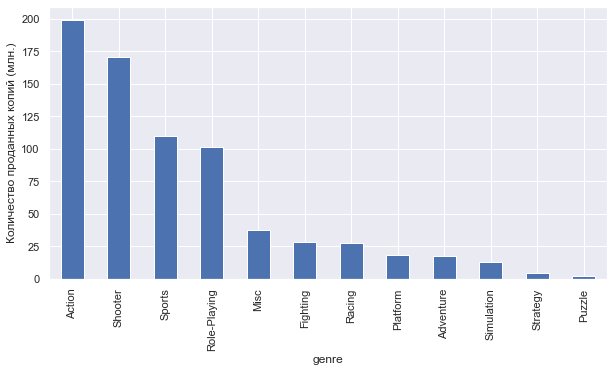

In [67]:
plt.ylabel('Количество проданных копий (млн.)')
plt.xlabel('Жанр')
stats_genre['total_sales'].sort_values(ascending=False).plot(kind='bar')
plt.show()

По общему количеству проданных копий лидирует жанр `Action`.

Возьмём восемь наиболее успешных жанров по общему количеству копий и среди них посмотрим медианные значения по количеству продаж.

In [68]:
#берём 8 наиболее успешных жанров по общему количеству копий
most_valuable_genres = stats_genre['total_sales'].sort_values(ascending=False).head(8).index

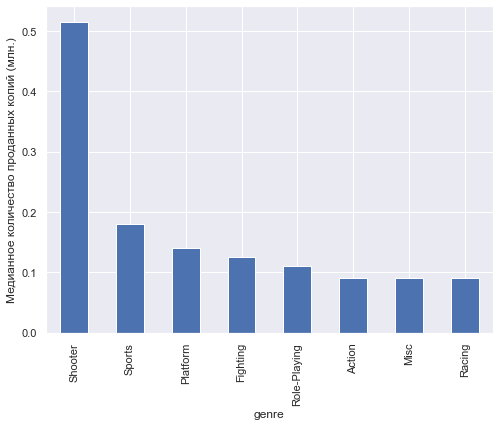

In [69]:
plt.xlabel('Жанр')
plt.ylabel('Медианное количество проданных копий (млн.)')
stats_genre.query('genre in @most_valuable_genres')['median_sales'].sort_values(ascending=False).plot(kind='bar', figsize=(8,6))
plt.show()

Среди самых кассовых жанров по общему количеству продаж, наиболее высокое медианное количество продаж наблюдается в жанре шутеров. На втором месте идёт жанр спортивных симуляторов, а на третьем - платформеры. Затем примерно с одинаковым значением идут драки, ролевые игры, гонки, экшены и игры прочих жанров. 

Проиллюстрируем сравнение продаж в разрезе жанров диаграммой размаха:

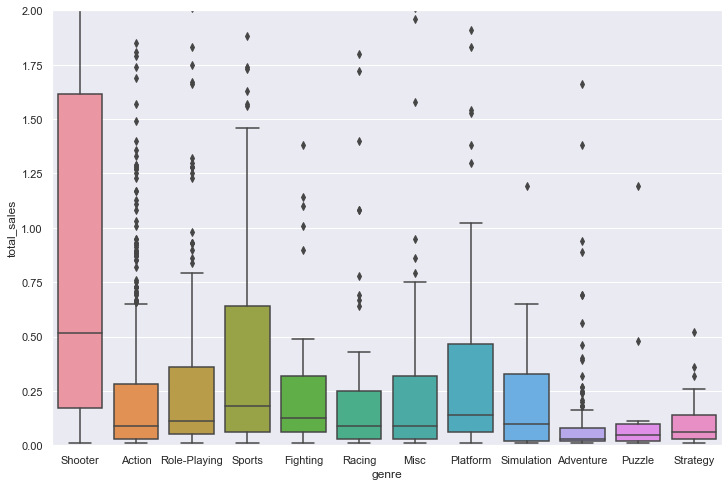

In [70]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(y='total_sales', x='genre', \
            data=actual_data)
plt.ylim(0,2)
plt.show()

Жанр `Shooter` намного выбивается из общего ряда в положительную сторону.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

Сделаем табличку со статистикой продаж по регионам в разрезе платформ

In [71]:
#создаём таблицу со статистикой продаж по регионам
stats_platform_region = actual_data.pivot_table(
            index=['platform'],\
            values=['na_sales', 'eu_sales', 'jp_sales'],\
            aggfunc=['mean', 'std', 'median', 'sum']\
).round(2).reset_index()

stats_platform_region.columns=['platform', 'eu_mean', 'jp_mean', 'na_mean', 'eu_std',
                               'jp_std',  'na_std', 'eu_median', 'jp_median',
                               'na_median',  'eu_sum', 'jp_sum', 'na_sum']

In [72]:
stats_platform_region

,platform,eu_mean,jp_mean,na_mean,eu_std,jp_std,na_std,eu_median,jp_median,na_median,eu_sum,jp_sum,na_sum
0,3DS,0.08,0.21,0.11,0.30,0.53,0.44,0.00,0.06,0.00,16.12,44.24,22.64
1,PC,0.12,0.00,0.05,0.21,0.00,0.11,0.05,0.00,0.00,17.97,0.00,7.23
2,PS3,0.12,0.05,0.10,0.33,0.08,0.23,0.01,0.02,0.02,25.54,11.22,22.05
3,PS4,0.35,0.04,0.26,0.82,0.07,0.58,0.07,0.02,0.05,130.04,15.02,98.61
4,PSP,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.02,0.00,0.00,0.36,0.00
5,PSV,0.01,0.05,0.01,0.05,0.07,0.03,0.00,0.03,0.00,3.53,14.54,2.52
6,Wii,0.24,0.00,0.19,0.27,0.00,0.31,0.12,0.00,0.04,2.59,0.00,2.08
7,WiiU,0.18,0.10,0.27,0.33,0.26,0.52,0.06,0.01,0.09,13.15,7.31,19.36
8,X360,0.14,0.00,0.25,0.24,0.00,0.40,0.05,0.00,0.10,15.49,0.08,28.30
9,XOne,0.20,0.00,0.36,0.37,0.01,0.63,0.07,0.00,0.10,46.25,0.32,81.27


Посмотрим данные о пяти самых популярных по количеству продаж платформах в каждом регионе

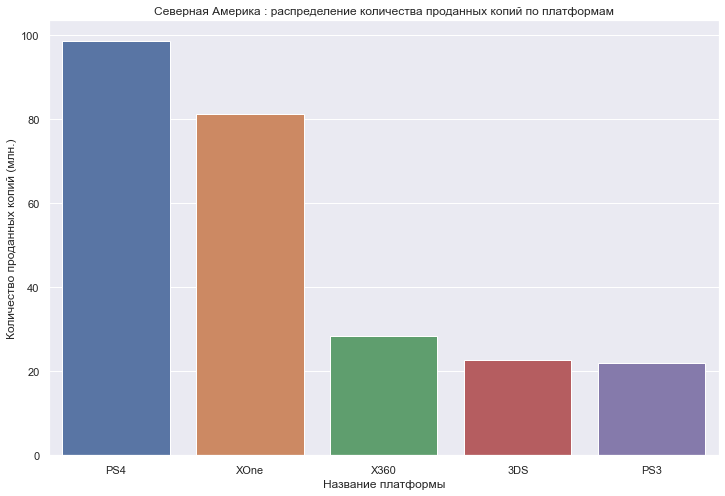

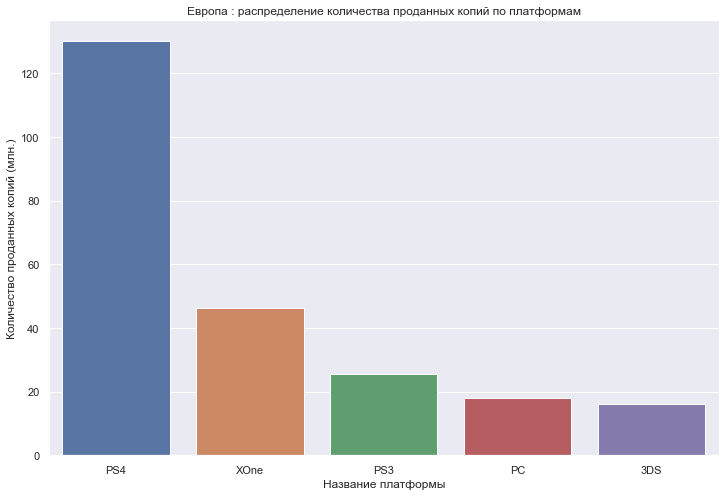

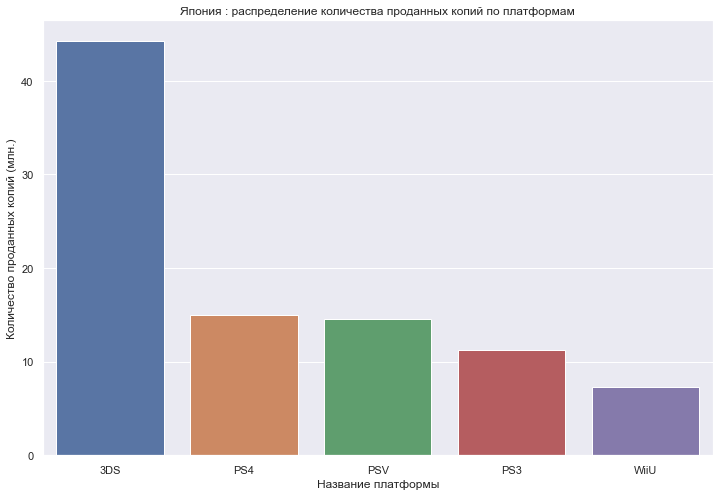

In [73]:
for region in ['na_sum', 'eu_sum', 'jp_sum']:
    if region=='na_sum':
        name_region='Северная Америка'
    elif region=='eu_sum':
        name_region='Европа'
    elif region=='jp_sum':
        name_region='Япония'
        
    ax = sns.barplot(x='platform',
            y=region,
            data=stats_platform_region.sort_values(by=region, ascending=False).head(5)[['platform',region]]
            )

    ax.set_title(name_region + ' : распределение количества проданных копий по платформам' )
    ax.set(xlabel='Название платформы', ylabel='Количество проданных копий (млн.)');
    plt.show()

В Европе и Северной Америке пятёрка самым популярных платформ состоит из одинакового набора, и даже первое и второе место и там и там принадлежат PS4 и XboxOne. Отличия в очередности по популярности в Европе и Америке есть только для платформ, занимающих 3-5 места.

В Японии пятерка популярных платформ значительно отличается от Европы и Америки.
Первое место занимает Nintendo 3DS, а также в пятёрку входят платформы PSV и WiiU.

Обратим внимание как распределяются доли продаж между платформами в каждом регионе:

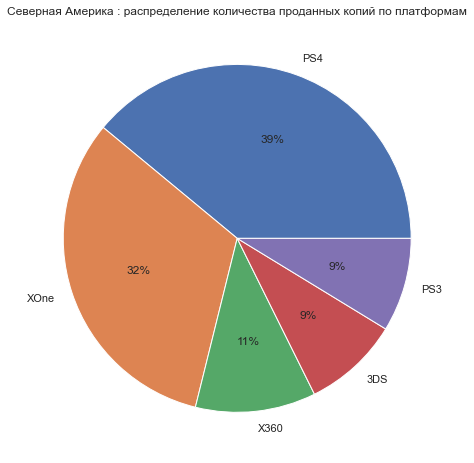

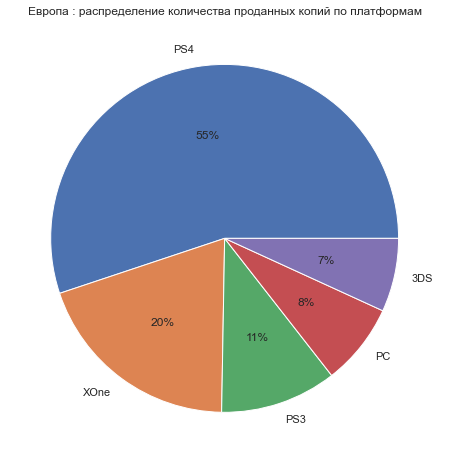

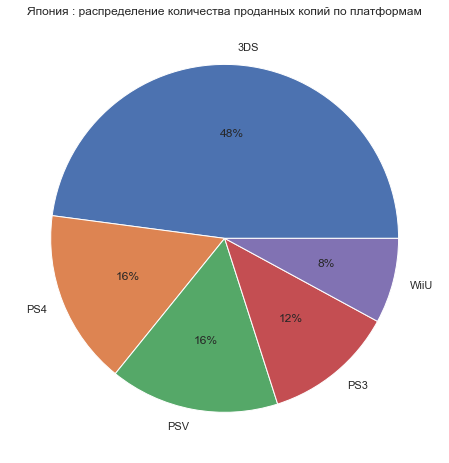

In [74]:
for region in ['na_sum', 'eu_sum', 'jp_sum']:
    if region=='na_sum':
        name_region='Северная Америка'
    elif region=='eu_sum':
        name_region='Европа'
    elif region=='jp_sum':
        name_region='Япония'
    
    plot_info = stats_platform_region.sort_values(by=region, ascending=False).head(5)[['platform',region]].set_index('platform')
    ax = plot_info\
    .plot(x='platform',  y=region, kind='pie', autopct='%1.0f%%', legend=False)
    
    ax.set_title(name_region + ' : распределение количества проданных копий по платформам' )
    ax.set(xlabel='', ylabel='');
    plt.show()

В Северной Америке и Европе лидируют две платформы: PS4 и XBoxOne

В Северной Америке нет явного лидера. PS4 и XBoxOne занимают близкие по объёму доли рынка.

В Европе и Японии есть ярко выраженный лидер, занимающий почти половину рынка. В Японии это Nintendo 3DS, а в Европе - PlayStation 4. 

### Самые популярные жанры (топ-5)

Сделаем табличку со статистикой продаж по регионам в разрезе жанров

In [75]:
#создаём таблицу со статистикой продаж по регионам
stats_genre_region = actual_data.pivot_table(
            index=['genre'],\
            values=['na_sales', 'eu_sales', 'jp_sales'],\
            aggfunc=['median', 'sum']\
).round(2).reset_index()

stats_genre_region.columns=['genre', 'eu_median', 'jp_median',
                               'na_median',  'eu_sum', 'jp_sum', 'na_sum']

In [76]:
stats_genre_region

,genre,eu_median,jp_median,na_median,eu_sum,jp_sum,na_sum
0,Action,0.02,0.01,0.01,74.68,29.58,72.53
1,Adventure,0.00,0.01,0.00,6.49,3.60,5.64
2,Fighting,0.02,0.03,0.04,6.69,6.37,12.43
3,Misc,0.01,0.01,0.01,12.86,5.61,15.05
4,Platform,0.06,0.00,0.08,6.80,2.69,6.79
5,Puzzle,0.00,0.03,0.00,0.52,0.93,0.65
6,Racing,0.05,0.00,0.03,14.13,1.76,8.74
7,Role-Playing,0.01,0.05,0.02,28.17,31.16,33.47
8,Shooter,0.22,0.00,0.22,65.52,4.87,79.02
9,Simulation,0.03,0.00,0.00,7.30,2.31,2.63


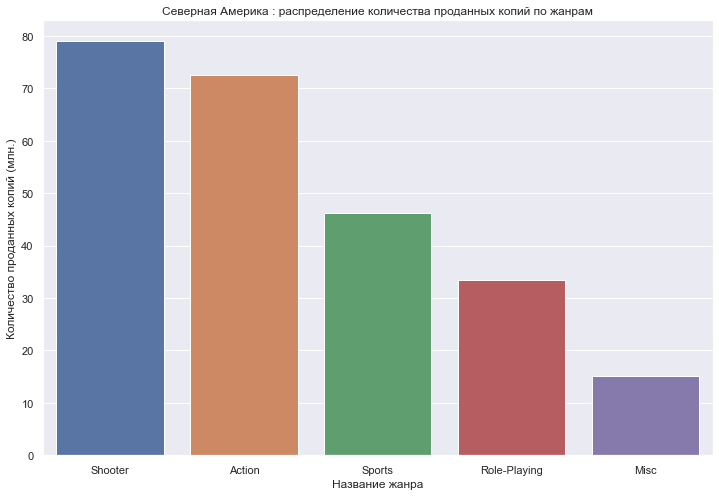

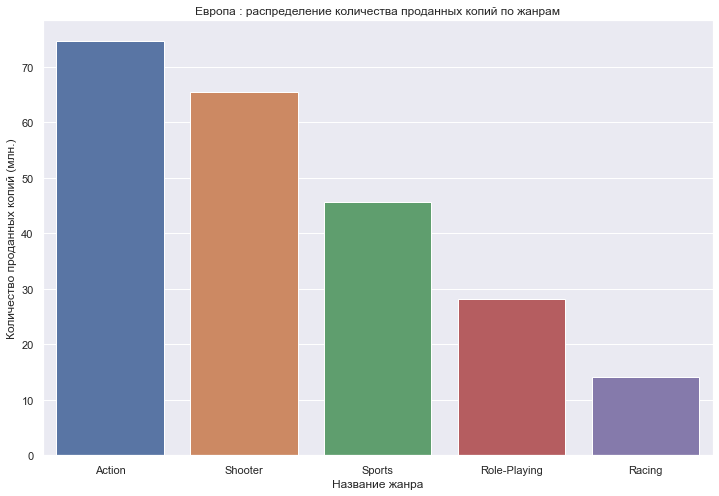

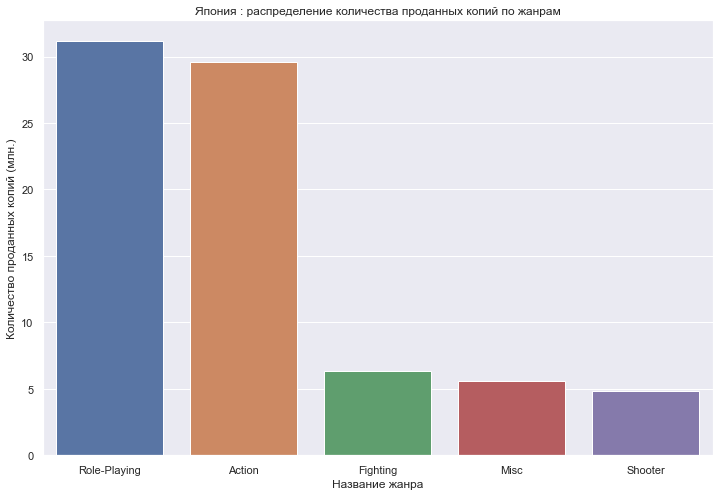

In [77]:
for region in ['na_sum', 'eu_sum', 'jp_sum']:
    if region=='na_sum':
        name_region='Северная Америка'
    elif region=='eu_sum':
        name_region='Европа'
    elif region=='jp_sum':
        name_region='Япония'
        
    ax = sns.barplot(x='genre',
            y=region,
            data=stats_genre_region.sort_values(by=region, ascending=False).head(5)[['genre',region]]
            )

    ax.set_title(name_region + ' : распределение количества проданных копий по жанрам' )
    ax.set(xlabel='Название жанра', ylabel='Количество проданных копий (млн.)');
    plt.show()

Популярность жанров схожа в Северной Америке и Европе. Первая четверка жанров почти совпадает. Самыми кассовыми является жанры `Action` и `Shooter`, а за ними следуют спортивные симуляторы и ролевые игры.

В Японии первое место занимают ролевые игры, за которыми с небольшим отрывом следуют игры жанра `Action`. Кроме этого в пятерку входит жанр `Fighting`, отсутствующий среди первых по популярности в Европе и Америке.

Посмотрим на круговых диаграммах как распределяются доли продаж между жанрами в каждом регионе:

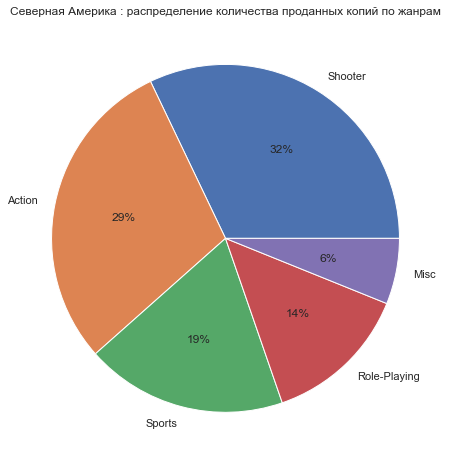

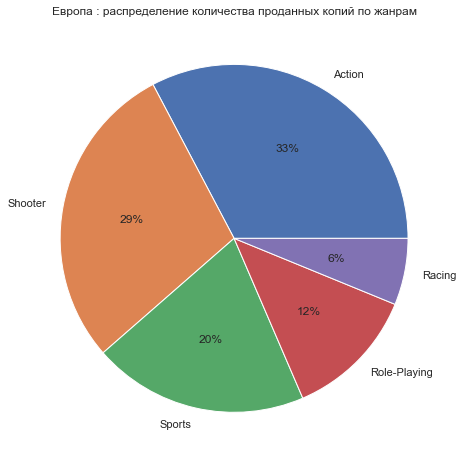

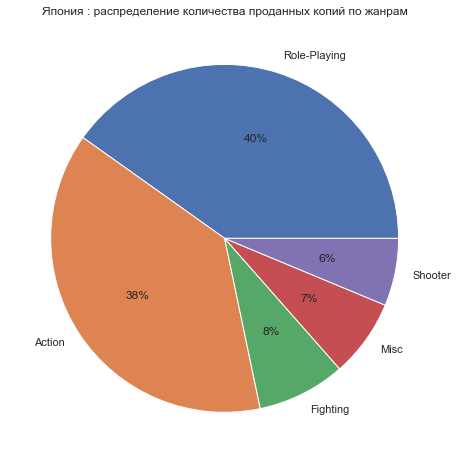

In [78]:
for region in ['na_sum', 'eu_sum', 'jp_sum']:
    if region=='na_sum':
        name_region='Северная Америка'
    elif region=='eu_sum':
        name_region='Европа'
    elif region=='jp_sum':
        name_region='Япония'
    
    ax = stats_genre_region.sort_values(by=region, ascending=False).head(5)[['genre',region]].set_index('genre')\
    .plot(x='genre',  y=region, kind='pie', autopct='%1.0f%%', legend=False)
    
    ax.set_title(name_region + ' : распределение количества проданных копий по жанрам' )
    ax.set(xlabel='', ylabel='');
    plt.show()

Жанр `Action` во всех регионах занимает около 30-35% по количеству проданных копий. При этом он является лидером в Европе, а в Северной Америке уступает жанру `Shooter`, а в Японии - жанру ролевых игр.

Примерно 80 процентов рынка в каждом регионе занято всего двумя-тремя жанрами. В Европе и Америке это: `Action`, `Shooter` и `Sports`, а в Японии - `Role-Playing` и `Action`.

Посмотрим рапределение по количеству проданных копий в разрезе наиболее кассовых жанров.

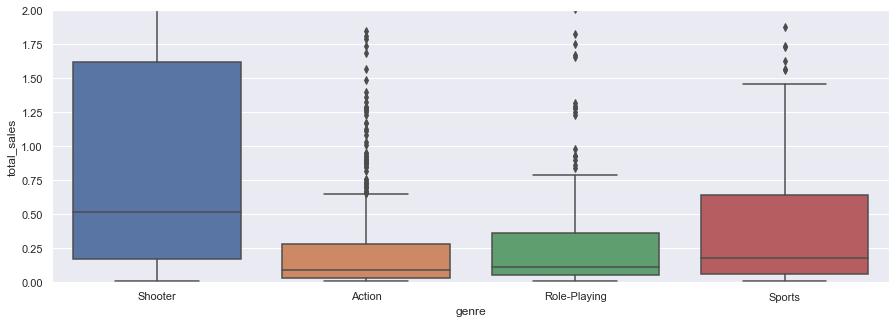

In [79]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(y='total_sales', x='genre', \
            data=actual_data.query('genre in ["Action", "Shooter","Role-Playing", "Sports"]'))
plt.ylim(0,2);

Самая высокая медиана по количеству проданных копий у жанра Shooter. Следом идут спортивные игры. 
Жанры `Action` и `Role-Playing` значительно уступают по медианному количеству проданных копий. Видимо общее количество продаж в этих жанрах обеспечивается бестселлерами, а в спортивных играх и шутерах наоборот, меньше бестселлеров, но при этом большее количество игр набирает большое количество проданных копий в диапазоне от 0.25 до 0.5 млн. штук.

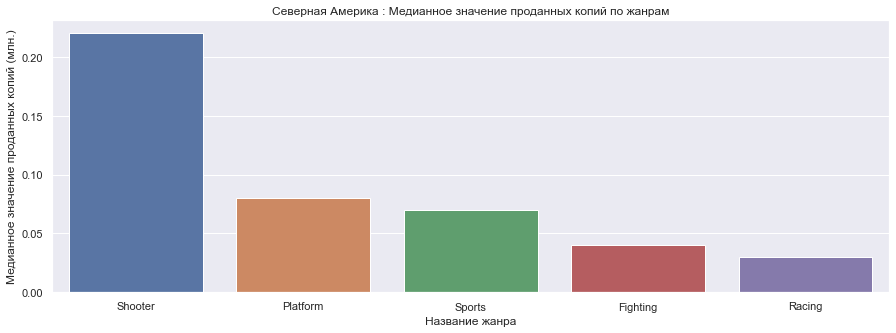

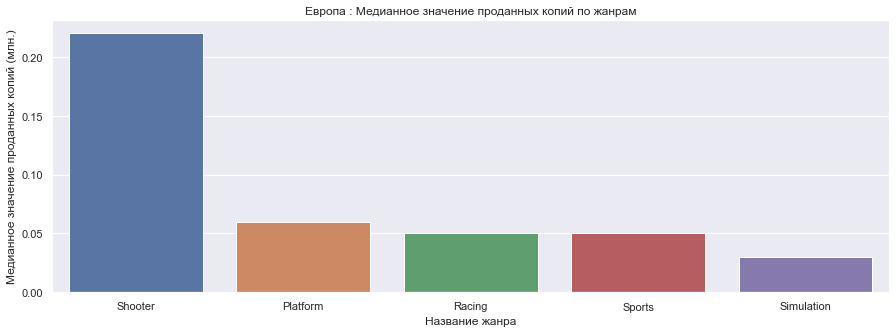

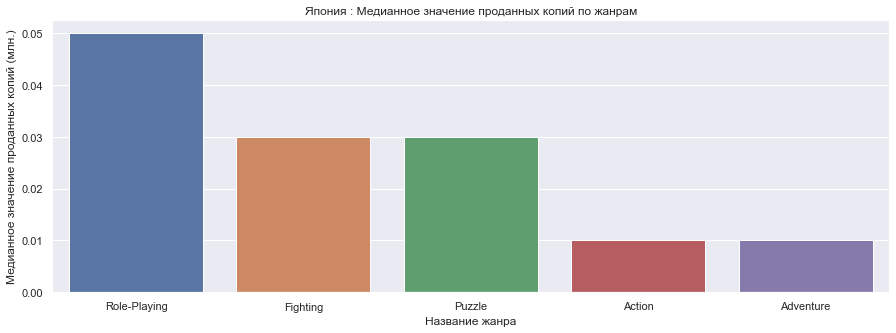

In [80]:
for region in ['na_median', 'eu_median', 'jp_median']:
    if region=='na_median':
        name_region='Северная Америка'
    elif region=='eu_median':
        name_region='Европа'
    elif region=='jp_median':
        name_region='Япония'
        
    ax = sns.barplot(x='genre',
            y=region,
            data=stats_genre_region.sort_values(by=region, ascending=False).head(5)[['genre',region]]
            )

    ax.set_title(name_region + ' : Медианное значение проданных копий по жанрам' )
    ax.set(xlabel='Название жанра', ylabel='Медианное значение проданных копий (млн.)');
    plt.show()

В Европе и Америке лучшее медианное значение по количеству проданных копий занимают игры жанра Shooter, а наиболее популярный по общему количеству копий жанр `Action` даже не вошёл в пятерку лучших по медианным продажам.

В Японии лучшее медианное значение по количеству проданных копий занимают игры жанра Role-Playing, за которым следует `Fighting`.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [81]:
print(f"Уникальные значения в столбце rating:")
print(actual_data['rating'].unique(),'\n')

Уникальные значения в столбце rating:
['рейтинг не определён' 'M' 'E' 'T' 'E10+'] 



В нашей выборке отсутствуют игры с категорией AO - AdultsOnly, только для взрослых от 18 лет и старше.

In [82]:
#создаём таблицу со статистикой продаж по рейтингам
stats_rating_region = actual_data.pivot_table(
            index=['rating'],\
            values=['na_sales', 'eu_sales', 'jp_sales'],\
            aggfunc=['median', 'sum']\
).round(2).reset_index()

stats_rating_region.columns=['rating', 'eu_median', 'jp_median',
                               'na_median',  'eu_sum', 'jp_sum', 'na_sum']

In [83]:
stats_rating_region


,rating,eu_median,jp_median,na_median,eu_sum,jp_sum,na_sum
0,E,0.05,0.00,0.05,58.06,8.94,50.74
1,E10+,0.09,0.00,0.10,26.16,4.46,33.23
2,M,0.12,0.00,0.12,93.44,8.01,96.42
3,T,0.04,0.01,0.03,34.07,14.78,38.95
4,рейтинг не определён,0.00,0.02,0.00,58.95,56.90,64.72


Смотрим, какой процент от общего количества проданных копий занимают игры с различным рейтингом.

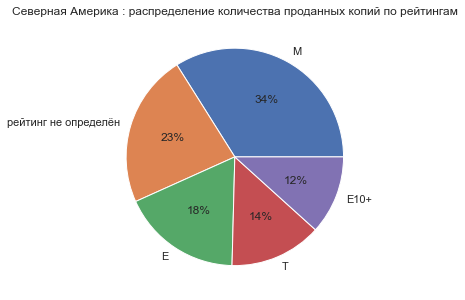

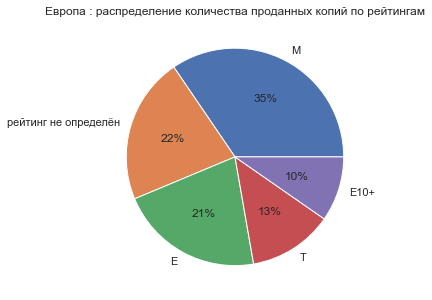

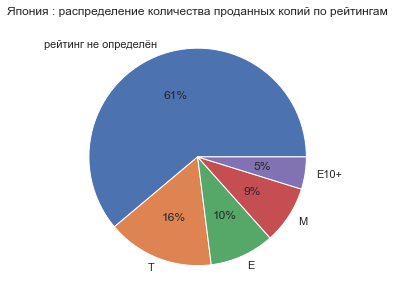

In [84]:
for region in ['na_sum', 'eu_sum', 'jp_sum']:
    if region=='na_sum':
        name_region='Северная Америка'
    elif region=='eu_sum':
        name_region='Европа'
    elif region=='jp_sum':
        name_region='Япония'
    
    ax = stats_rating_region.sort_values(by=region, ascending=False)[['rating',region]].set_index('rating')\
    .plot(x='rating',  y=region, kind='pie', autopct='%1.0f%%', legend=False)
    
    ax.set_title(name_region + ' : распределение количества проданных копий по рейтингам' )
    ax.set(xlabel='', ylabel='');
    plt.show()

В Европе и Америке около 40 процентов проданных копий относятся к играм с рейтингом `M` - для возраста 17+. И остальная структура продаж в завимости от рейтинга похожа. В обоих регионах продаётся по 20% копий с рейтингом `E` - для любого возраста, и с неопределённым рейтингом, и по 10% игр с рейтингами `E10+` - для детей старше 10 лет, и `T` - для подростков от 13 до 17 лет.

В Японии 60% продаж приходится на игры без присвоенного рейтинга. 

Рассмотрим медианное количество проданных копий для игр с различными рейтингами ESRB.

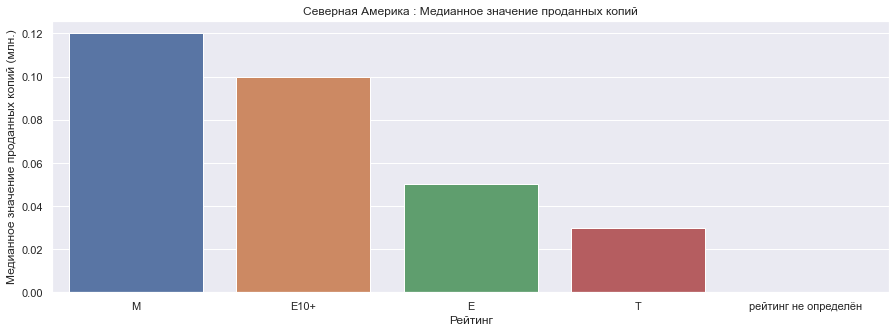

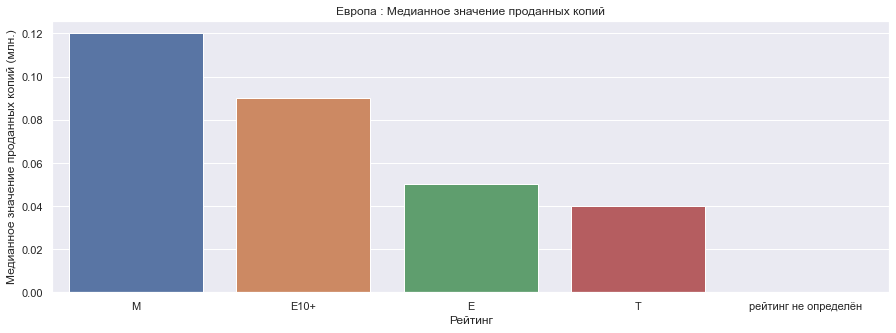

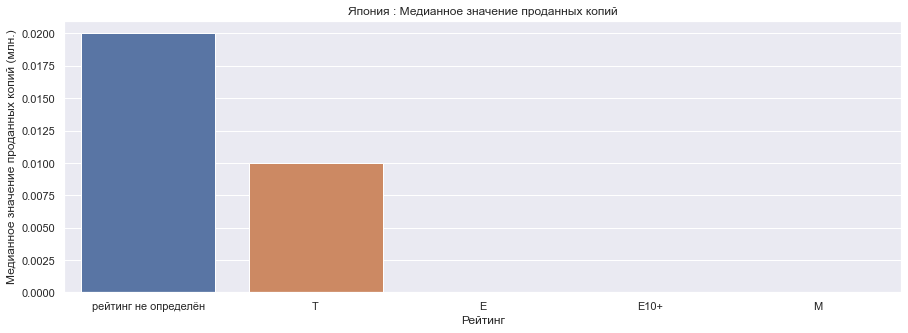

In [85]:
for region in ['na_median', 'eu_median', 'jp_median']:
    if region=='na_median':
        name_region='Северная Америка'
    elif region=='eu_median':
        name_region='Европа'
    elif region=='jp_median':
        name_region='Япония'
        
    ax = sns.barplot(x='rating',
            y=region,
            data=stats_rating_region.sort_values(by=region, ascending=False).head(5)[['rating',region]]
            )

    ax.set_title(name_region + ' : Медианное значение проданных копий' )
    ax.set(xlabel='Рейтинг', ylabel='Медианное значение проданных копий (млн.)');
    plt.show()

Можно отметить, что в Европе и Северной Америке, медианное значение количества проданных копий для игр без рейтинга стремится к нулю. Пользователи более расположены покупать игры с присвоенным рейтингом.

На рынке Японии ситуация другая, видимо там менее обращают внимание на наличие рейтинга. 

## Проверка гипотез

###  Гипотеза 1: средние пользовательские рейтинги платформ XboxOne и PC одинаковые

Создадим датасет для анализа, в котором оставим данные только для двух интересующих нас платформ.

In [86]:
hyp1_data = actual_data[(actual_data['platform'] == 'XOne') | (actual_data['platform'] == 'PC')]

Визуально оценим, как распределяются оценки пользователей для платформ XboxOne и PC.

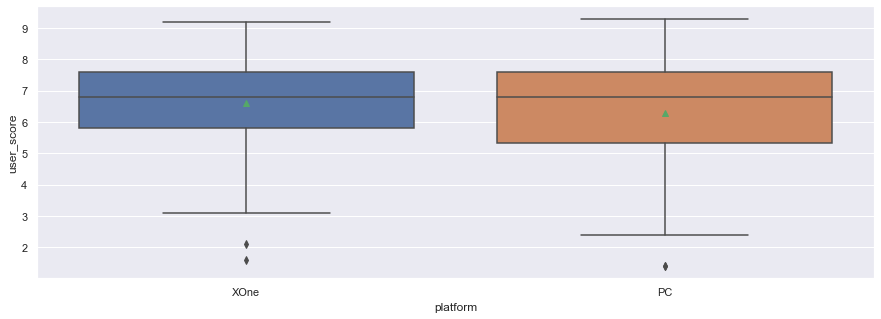

In [87]:
sns.boxplot(y="user_score", x="platform", showmeans=True, data=hyp1_data)
plt.show()

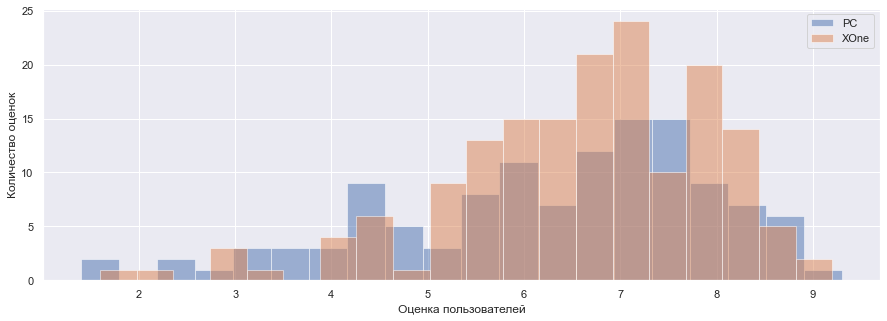

In [88]:
hyp1_data.groupby('platform')['user_score'].plot(kind='hist', bins=20, alpha=0.5)
plt.legend(['PC', 'XOne'])
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество оценок')
plt.show()

**Проверка гипотезы:** средние оценки пользователей платформ XboxOne и PC одинаковые;

H_0: Оценка пользователей (user_score) платформы `XboxOne` = Оценка пользователей (user_score) платформы `PC`

H_a: Оценка пользователей (user_score) платформы `XboxOne` ≠ Оценка пользователей (user_score) платформы `PC`

alpha = 0.05

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [89]:
xone_sample = hyp1_data[hyp1_data['platform'] =='XOne']['user_score']
pc_sample = hyp1_data[hyp1_data['platform'] =='PC']['user_score']

#вызов метода для проверки гипотезы
results = st.ttest_ind(xone_sample, pc_sample, equal_var=False, nan_policy='omit')

#зададим значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Для проверки первой гипотезы мы использовали метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Формулировка нулевой гипотезы совпадает с изначальной гипотезой, и утверждает, что средние оценки пользователей платформ XboxOne и PC одинаковы.

По итогам теста мы не смогли отвергнуть нулевую гипотезу, и соответственно с большой долей вероятности средние оценки пользователей платформ XboxOne и PC не имеют статистически значимых отличий. 

###  Гипотеза 2: cредние пользовательские рейтинги жанров Action и Sports разные.

Создадим датасет для анализа, в котором оставим данные только для двух интересующих нас жанров.

In [90]:
hyp2_data = actual_data[(actual_data['genre'] == 'Action') | (actual_data['genre'] == 'Sports')]

Визуально оценим, как распределяются оценки пользователей для жанров Action и Sports.

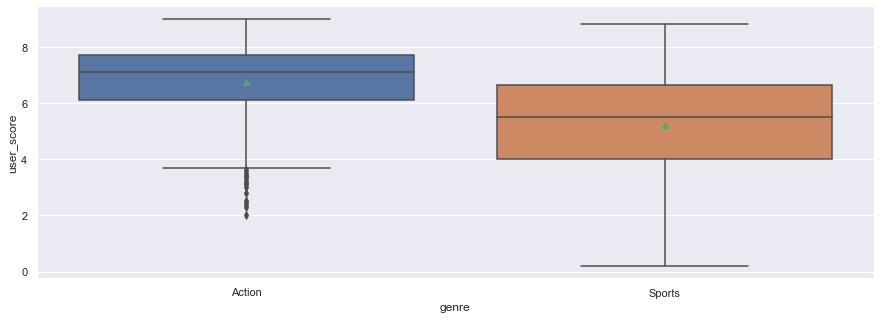

In [91]:
sns.boxplot(y="user_score", x="genre", showmeans=True, data=hyp2_data)
plt.show()

**Проверка гипотезы:** средние оценки пользователей для жанров Action и Sports разные;

H_0: Оценка пользователей (user_score) жанра `Action` = Оценка пользователей (user_score) жанра `Sports`

H_a: Оценка пользователей (user_score) жанра `Action` ≠ Оценка пользователей (user_score) анра `Sports`

alpha = 0.05

In [92]:
action_sample = hyp2_data[hyp2_data['genre'] =='Action']['user_score']
sports_sample = hyp2_data[hyp2_data['genre'] =='Sports']['user_score']

#вызов метода для проверки гипотезы
results = st.ttest_ind(action_sample, sports_sample, equal_var=False, nan_policy='omit')

#зададим значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# вывод строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.182555038264477e-14
Отвергаем нулевую гипотезу


Для проверки второй гипотезы мы также как и в первом случае использовали метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Формулировку нулевой гипотезы выбрали противоположную изначальной гипотезе, чтобы в нулевой гипотезе использовать знак равенства.

По итогам теста,  на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы. Соотвественно с большой вероятностью средние оценки пользователей для жанров Action и Sports различаются. 

## Общий вывод

В проекте были изучены данные о компьютерных играх для различных платформ и объёмах их продаж в различных регионах.

После первоначального знакомства с данными были определены пропущенные значения в столбцах. Были исправлены отсутствующие значения в следующих столбцах:

- удалены единичные строки с пропусками в столбцах `name`, `genre`,
- удалены строки с пропусками в столбце year_of_release, которые занимале 1.6% от объёма датасета.
- для столбца rating заменили пропуски константой "рейтинг не определён"

На этапе предобработки данных поменяли типы столбцов:

- `critic_score` поменяли тип данных на int, так как оценка критиков содержит целые значения.
- `year_of_release` поменяли тип данных на int.
- `user_score` поменяли тип данных на float, так как оценка пользователей измеряется с точностью до одной десятой. 

Были исправлены некоторые значения в столбцах:
- в `user_score` значение "tbd", которое может означать  `To Be Determined` (будет определено) или `To Be Decided` (будет решено) заменили на неопределенное.
- В столбце `rating` значения "K-A", которые в 1998 году в рейтинге ESRB были переименованы в "E", заменили на соответствующее значение.
- В столбце `rating` значения "RP", которые означают, что рейтинг ещё не присвоен, заменили на константу 'рейтинг не определён'.

Добавили столбец `total_sales` с суммарным количеством проданных копий игры во всех регионах.

Был проведен исследовательский анализ данных и обнаружены следующие особенности:

- период жизни платформы составляет в среднем пять-шесть лет.
- платформы набирают популярность за один-два года, затем также примерно один-два года удерживаются на пике популярности, после чего теряют продажи. При этом к 2015-му году только две платформы имели растущий тренд, а все остальные уже шли на спад.
- игры на PC выбиваются из общего ряда и существуют более 24 лет.
- для дальнейшего анализа было решено оставить актуальные данные за последние три года
- наиболее прибыльными являются платформы PS4 и XOne. При этом у платформы 3DS хиты сопоставимы по уровню продаж с хитами для PS4. 
- выявлено наличие взаимосвязи между оценками экспертов и количеством продаж. Для платформ PS4, XOne, 3DS коэффиценты корреляции находятся в диапазоне 0.35 - 0.41. Но для PC такая взаимосвязь практически отсутствует или слабо выражена, коээфициент Пирсона в два раза меньше и составляет 0.19.
- не выявлено наличия взаимосвязи между оценками пользователей и количеством проданных копий.
- по общему количеству проданных копий лидирует жанр Action.
- по медианному количеству продаж выделяются игры в жанре шутеров, за которым следуют жанры спортивных симуляторов и платформеров.

Были изучены факторы, определяющие портрет пользователя в разных регионах:

- В Европе наиболее популярна платформа `PS4`, и продаётся больше всего копий игр в жанрах `Action`, `Shooter` и `Sports`. По медианному значению количества проданных игр выделяются жанры `Shooter` и `Platform`.
- Вкусы пользователей в Северной Америке во много схожи с европейцами. Самой популярной платформой также является `PS4`, но её отрыв от других платформ не такой существенных как в Европе, и она лишь немного выделяется среди ещё трёх платформ почти равных по доле продаж. Пользователи в Северной Америке также как и в Европе наибольшее количество копий купили в жанрах `Action`, `Shooter` и `Sports`, а по медианному значению количества проданных игр можно сказать, что американцы предпочитают жанры `Shooter`, `Platform` и `Sports`.
- В Европе и Северной Америке, пользователи более расположены покупать игры с присвоенным рейтингом. Медианное значение количества проданных копий для игр без рейтинга стремится к нулю.
- Портрет пользователя в Японии значительно отличается от пользователей американского и европейского регионов. Наиболее популярной платформой здесь является Nintendo 3DS, а самые продаваемые игры, и по общему количеству копий и по медианному значению продаж одной игры, относятся к жанру `Role-Playing`. В Японии 60% продаж приходится на игры без присвоенного рейтинга.

Были проверены две гипотезы и сделан выводы, что с большой вероятностью:  
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.


При планировании рекламных компаний можно рекомендовать учитывать специфику регионов и делать ставку на игры, обладающие следующими параметрами:

1. Для Северной Америки и Европы продукт:
- выпущен для платформы  PS4 или XboxOne
- в жанре `Shooter`
- с присвоенным рейтингом, желательно в категории `M`
- можно обращать внимание на оценки экспертов, и не обращать - на оценки пользователей.

2. Для Японии продукт:
- выпущен для платформы Nintendo 3DS
- в жанре `Role-Playing`
- вне зависимости от наличия и категории рейтинга
- можно не обращать внимание на оценки экспертов и пользователей.

